# Medical Data Visualizer

In this project, you will visualize and make calculations from medical examination data using  `matplotlib`,  `seaborn`, and  `pandas`. The dataset values were collected during medical examinations.

## Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

| Feature                              | Variable Type         | Variable     | Value Type                                    |
|---------------------------------------|----------------------|--------------|-----------------------------------------------|
| Age                                  | Objective Feature    | `age`        | int (days)                                    |
| Height                               | Objective Feature    | `height`     | int (cm)                                      |
| Weight                               | Objective Feature    | `weight`     | float (kg)                                    |
| Gender                               | Objective Feature    | `gender`     | categorical code                              |
| Systolic blood pressure               | Examination Feature  | `ap_hi`      | int                                           |
| Diastolic blood pressure              | Examination Feature  | `ap_lo`      | int                                           |
| Cholesterol                          | Examination Feature  | `cholesterol`| 1: normal, 2: above normal, 3: well above normal |
| Glucose                              | Examination Feature  | `gluc`       | 1: normal, 2: above normal, 3: well above normal |
| Smoking                              | Subjective Feature   | `smoke`      | binary                                        |
| Alcohol intake                       | Subjective Feature   | `alco`       | binary                                        |
| Physical activity                    | Subjective Feature   | `active`     | binary                                        |
| Presence or absence of cardiovascular disease | Target Variable      | `cardio`     | binary                                        |

## Instructions

Create a chart similar to  `examples/Figure_1.png`, where we show the counts of good and bad outcomes for the  `cholesterol`,  `gluc`,  `alco`,  `active`, and  `smoke`  variables for patients with  `cardio=1`  and  `cardio=0`  in different panels.

By each number in the  `medical_data_visualizer.py`  file, add the code from the associated instruction number below.

1.  Import the data from  `medical_examination.csv`  and assign it to the  `df`  variable.
2.  Add an  `overweight`  column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value  `0`  for NOT overweight and the value  `1`  for overweight.
3.  Normalize data by making  `0`  always good and  `1`  always bad. If the value of  `cholesterol`  or  `gluc`  is 1, set the value to  `0`. If the value is more than  `1`, set the value to  `1`.
4.  Draw the Categorical Plot in the  `draw_cat_plot`  function.
5.  Create a DataFrame for the cat plot using  `pd.melt`  with values from  `cholesterol`,  `gluc`,  `smoke`,  `alco`,  `active`, and  `overweight`  in the  `df_cat`  variable.
6.  Group and reformat the data in  `df_cat`  to split it by  `cardio`. Show the counts of each feature. You will have to rename one of the columns for the  `catplot`  to work correctly.
7.  Convert the data into  `long`  format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import:  `sns.catplot()`.
8.  Get the figure for the output and store it in the  `fig`  variable.
9.  Do not modify the next two lines.
10.  Draw the Heat Map in the  `draw_heat_map`  function.
11.  Clean the data in the  `df_heat`  variable by filtering out the following patient segments that represent incorrect data:
     -   diastolic pressure is higher than systolic (Keep the correct data with  `(df['ap_lo'] <= df['ap_hi'])`)
     -   height is less than the 2.5th percentile (Keep the correct data with  `(df['height'] >= df['height'].quantile(0.025))`)
     -   height is more than the 97.5th percentile
     -   weight is less than the 2.5th percentile
	 - weight is more than the 97.5th percentile
12.  Calculate the correlation matrix and store it in the  `corr`  variable.
13.  Generate a mask for the upper triangle and store it in the  `mask`  variable.
14.  Set up the  `matplotlib`  figure.
15.  Plot the correlation matrix using the method provided by the  `seaborn`  library import:  `sns.heatmap()`.
16.  Do not modify the next two lines.

# My Solution

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell; InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

# Import data
df = pd.read_csv("./medical_examination.csv")

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# Add 'overweight' column
df["overweight"] = df.apply(
    lambda x: 1 if x["weight"] / ((x["height"] / 100) ** 2) > 25 else 0, axis=1
)

In [4]:
# Normalize data by making 0 always good and 1 always bad.
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"] = df["cholesterol"].replace({1: 0, 2: 1, 3: 1})
df["gluc"] = df["gluc"].replace({1: 0, 2: 1, 3: 1})

## Draw Categorical Plot

In [6]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(
    df,
    id_vars=["cardio"],
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
)

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [7]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = df_cat.value_counts().reset_index(name="total")

,cardio,variable,value,total
0,1,alco,0,33156
1,0,alco,0,33080
2,1,smoke,0,32050
3,0,smoke,0,31781
4,0,gluc,0,30894
5,0,cholesterol,0,29330
6,0,active,1,28643
7,1,gluc,0,28585
8,1,active,1,27618
9,1,overweight,1,24440


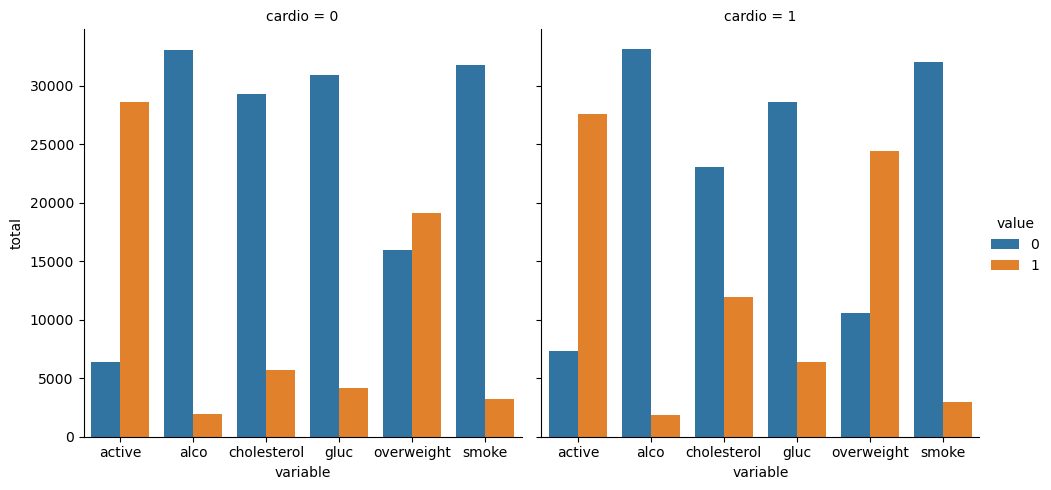

In [8]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(
    x="variable",
    y="total",
    col="cardio",
    hue="value",
    data=df_cat,
    kind="bar",
    order=sorted(["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]),
)

In [9]:
# save figure
fig.savefig("./catplot.png")

## Draw Heat Map

In [13]:
df[df["ap_lo"] > df["ap_hi"]]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
228,314,17489,2,183,98.0,160,1100,0,1,1,0,1,1,1
241,334,21932,2,157,60.0,160,1000,1,0,0,0,0,1,0
260,357,18217,1,150,83.0,140,800,0,0,0,0,1,1,1
329,458,23407,1,176,63.0,160,1000,1,1,0,0,0,1,0
345,482,18704,1,154,81.0,140,1000,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,0,0,0,0,1,1,1
69872,99798,21808,1,152,56.0,160,1000,0,0,0,0,1,1,0
69878,99807,21239,2,168,95.0,160,1000,0,0,0,0,1,1,1
69885,99816,22417,2,166,78.0,170,1000,0,0,0,0,0,0,1


In [14]:
# Clean the data
df_heat = df.loc[
    # ensure ap_lo is not above ap_hi
    (df["ap_lo"] <= df["ap_hi"])
    # keep height and weight within 2 standard deviations
    & (df["height"] >= df["height"].quantile(0.025))
    & (df["height"] <= df["height"].quantile(0.975))
    & (df["weight"] >= df["weight"].quantile(0.025))
    & (df["weight"] <= df["weight"].quantile(0.975))
]


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [15]:
# Calculate the correlation matrix
corr = df_heat.corr()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [16]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

<Axes: >

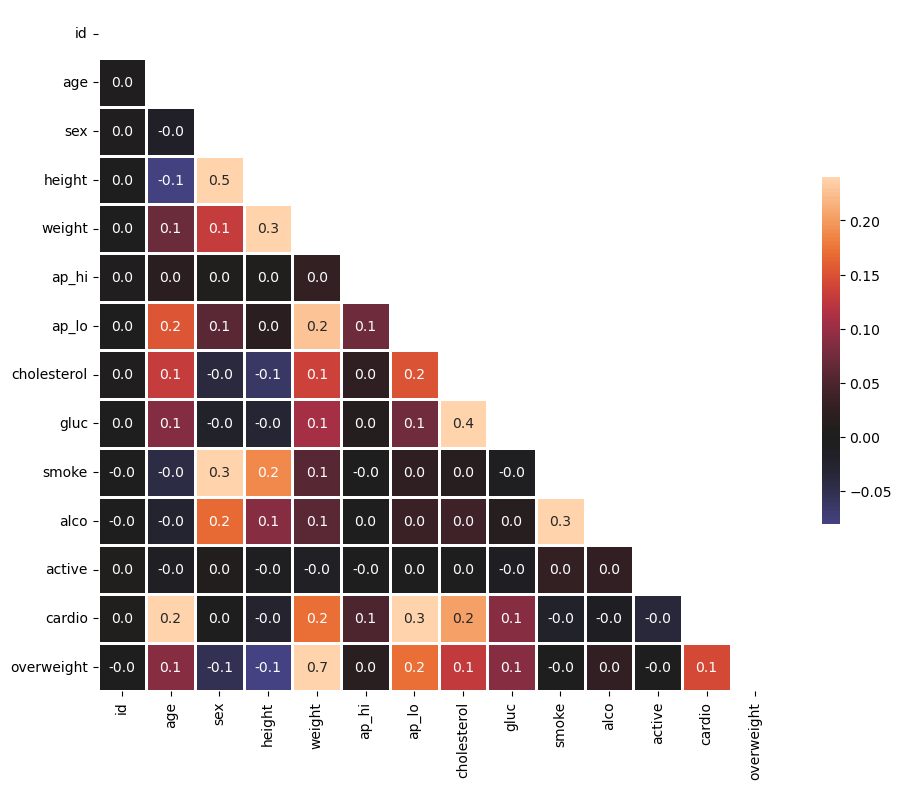

In [46]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(
    corr,
    mask=mask,
    square=True,
    annot=True,
    fmt=".1f",
    linewidths=1,
    cbar_kws={"shrink": 0.50},
    cmap="icefire",
    center=0,
    vmin=-0.08,
    vmax=0.24,
)


In [47]:
# save figure
fig.savefig('./heatmap.png')